# Decision Tree implementation using Python

In this section, we will implement a decision tree using python. We are going to use the famous IRIS dataset. The purpose is to classify this dataset and create a decision tree to decide the type of plant according to sepal_length, sepal_width, petal_length, and petal_width.

First thing is to import all the necessary libraries and classes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.tree import DecisionTreeClassifier #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree 
from sklearn.tree import plot_tree

Now load the dataset. IRIS dataset is available in the seaborn library as well. You can import it with the following command

In [ ]:
#reading the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


You should be able to get the above data. Here we have 4 feature columns sepal_length, sepal_width, petal_length, and petal_width respectively with one target column species.


## Exploratory data analysis (EDA)

Let's start with the exploratory data analysis.
Now performing some basic operations on it.

In [ ]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

As you can see, this dataset has 150 records and 5 columns. The the first four variables (columns) of type float and last of type object str. Now, let's check that there are no NAN values.

In [ ]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Let's continue with the some basic EDA on this dataset. Let’s check the correlation of all the features with each other. We can do this by using the function pairplot.

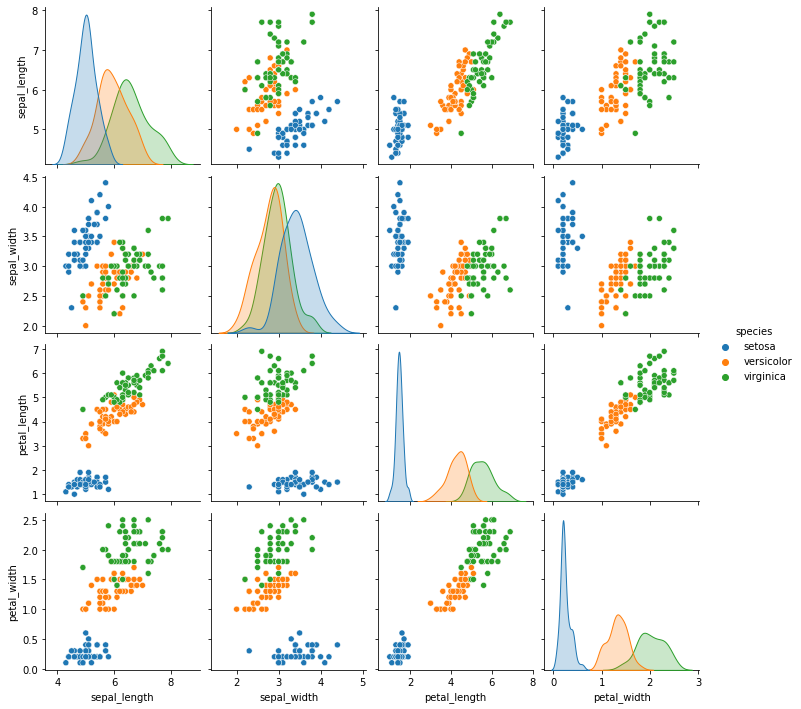

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'species')

As you can see, we have a total of 3 species that we want to predict: setosa, versicolor, and virginica. We can see that setosa always forms a different cluster from the other two.

Now let's explore the dataframe using a correlation heatmap using the heatmap function of the seaborn package. A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data. The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data.

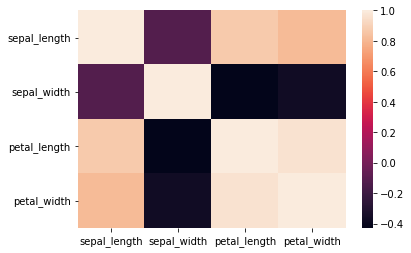

In [ ]:
# correlation matrix
sns.heatmap(df.corr())

We can observe from the above two plots that:

1. Setosa always forms a different cluster.
2. Petal length is highly related to petal width.
3. Sepal length is not related to sepal width.

## Data Preprocessing
Now, we will separate the target variable(y) and features(X) as follows

In [ ]:
target = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis =1)

It is good practice not to drop or add a new column to the original dataset. Make a copy of it and then modify it so in case things don’t work out as we expected, we have the original data to start again with a different approach.

Just for the sake of following mostly used convention, we are storing df in X

In [ ]:
# Defining the attributes
X = df1

Now, let’s have a look at our target variable

In [ ]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

As you can observe, "target" has categorical variables stored in it.

We will encode it in numeric values for working. 
LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.
The function LabelEncoder encode target labels with value between 0 and n_classes-1 (in our case: 0, 1 and 2).
This transformer should be used to encode target values, i.e. y, and not the input X.

In [ ]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We get its encoding as above, setosa:0, versicolor:1, virginica:2

Again for the sake of following the standard naming convention, naming target as y

In [ ]:
y = target

Splitting the dataset into training and testing sets. Let's select 20% of the records, randomly, for testing:

Remember:

1. The training data is an initial set of data used to help a program understand how to apply technologies like neural networks to learn. That is, training data is used to train an algorithm.
2. The test data set is a data set used to provide an unbiased evaluation of a final model fit on the training data set
3. What is a good train split test? 80/20 is generally assumed to be a good split.

In [ ]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


After splitting the dataset we have 120 records(rows) for training and 30 records for testing purposes.

## Modeling Tree and testing it

We define our tree by using the function DecisionTreeClassifier(), wchich requires two parameters, X_train and y_train.

In [ ]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In the above code, we created an object of the class DecisionTreeClassifier , store its address in the variable dtree, so we can access the object using dtree. Then we fit this tree with our X_train and y_train . Finally, we print the statement Decision Tree Classifier Created after the decision tree is built.

In [ ]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We got an accuracy of 100% (1.00) on the testing dataset of 30 records.

Now, let’s plot the confusion matrix. A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

Text(0.5, 1.0, 'Accuracy Score: 1.0')

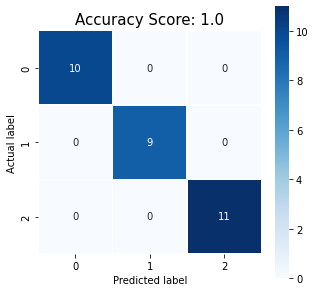

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## Visualizing the decision tree

You can visualise your decision tree by using the following command.

Explore this function here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

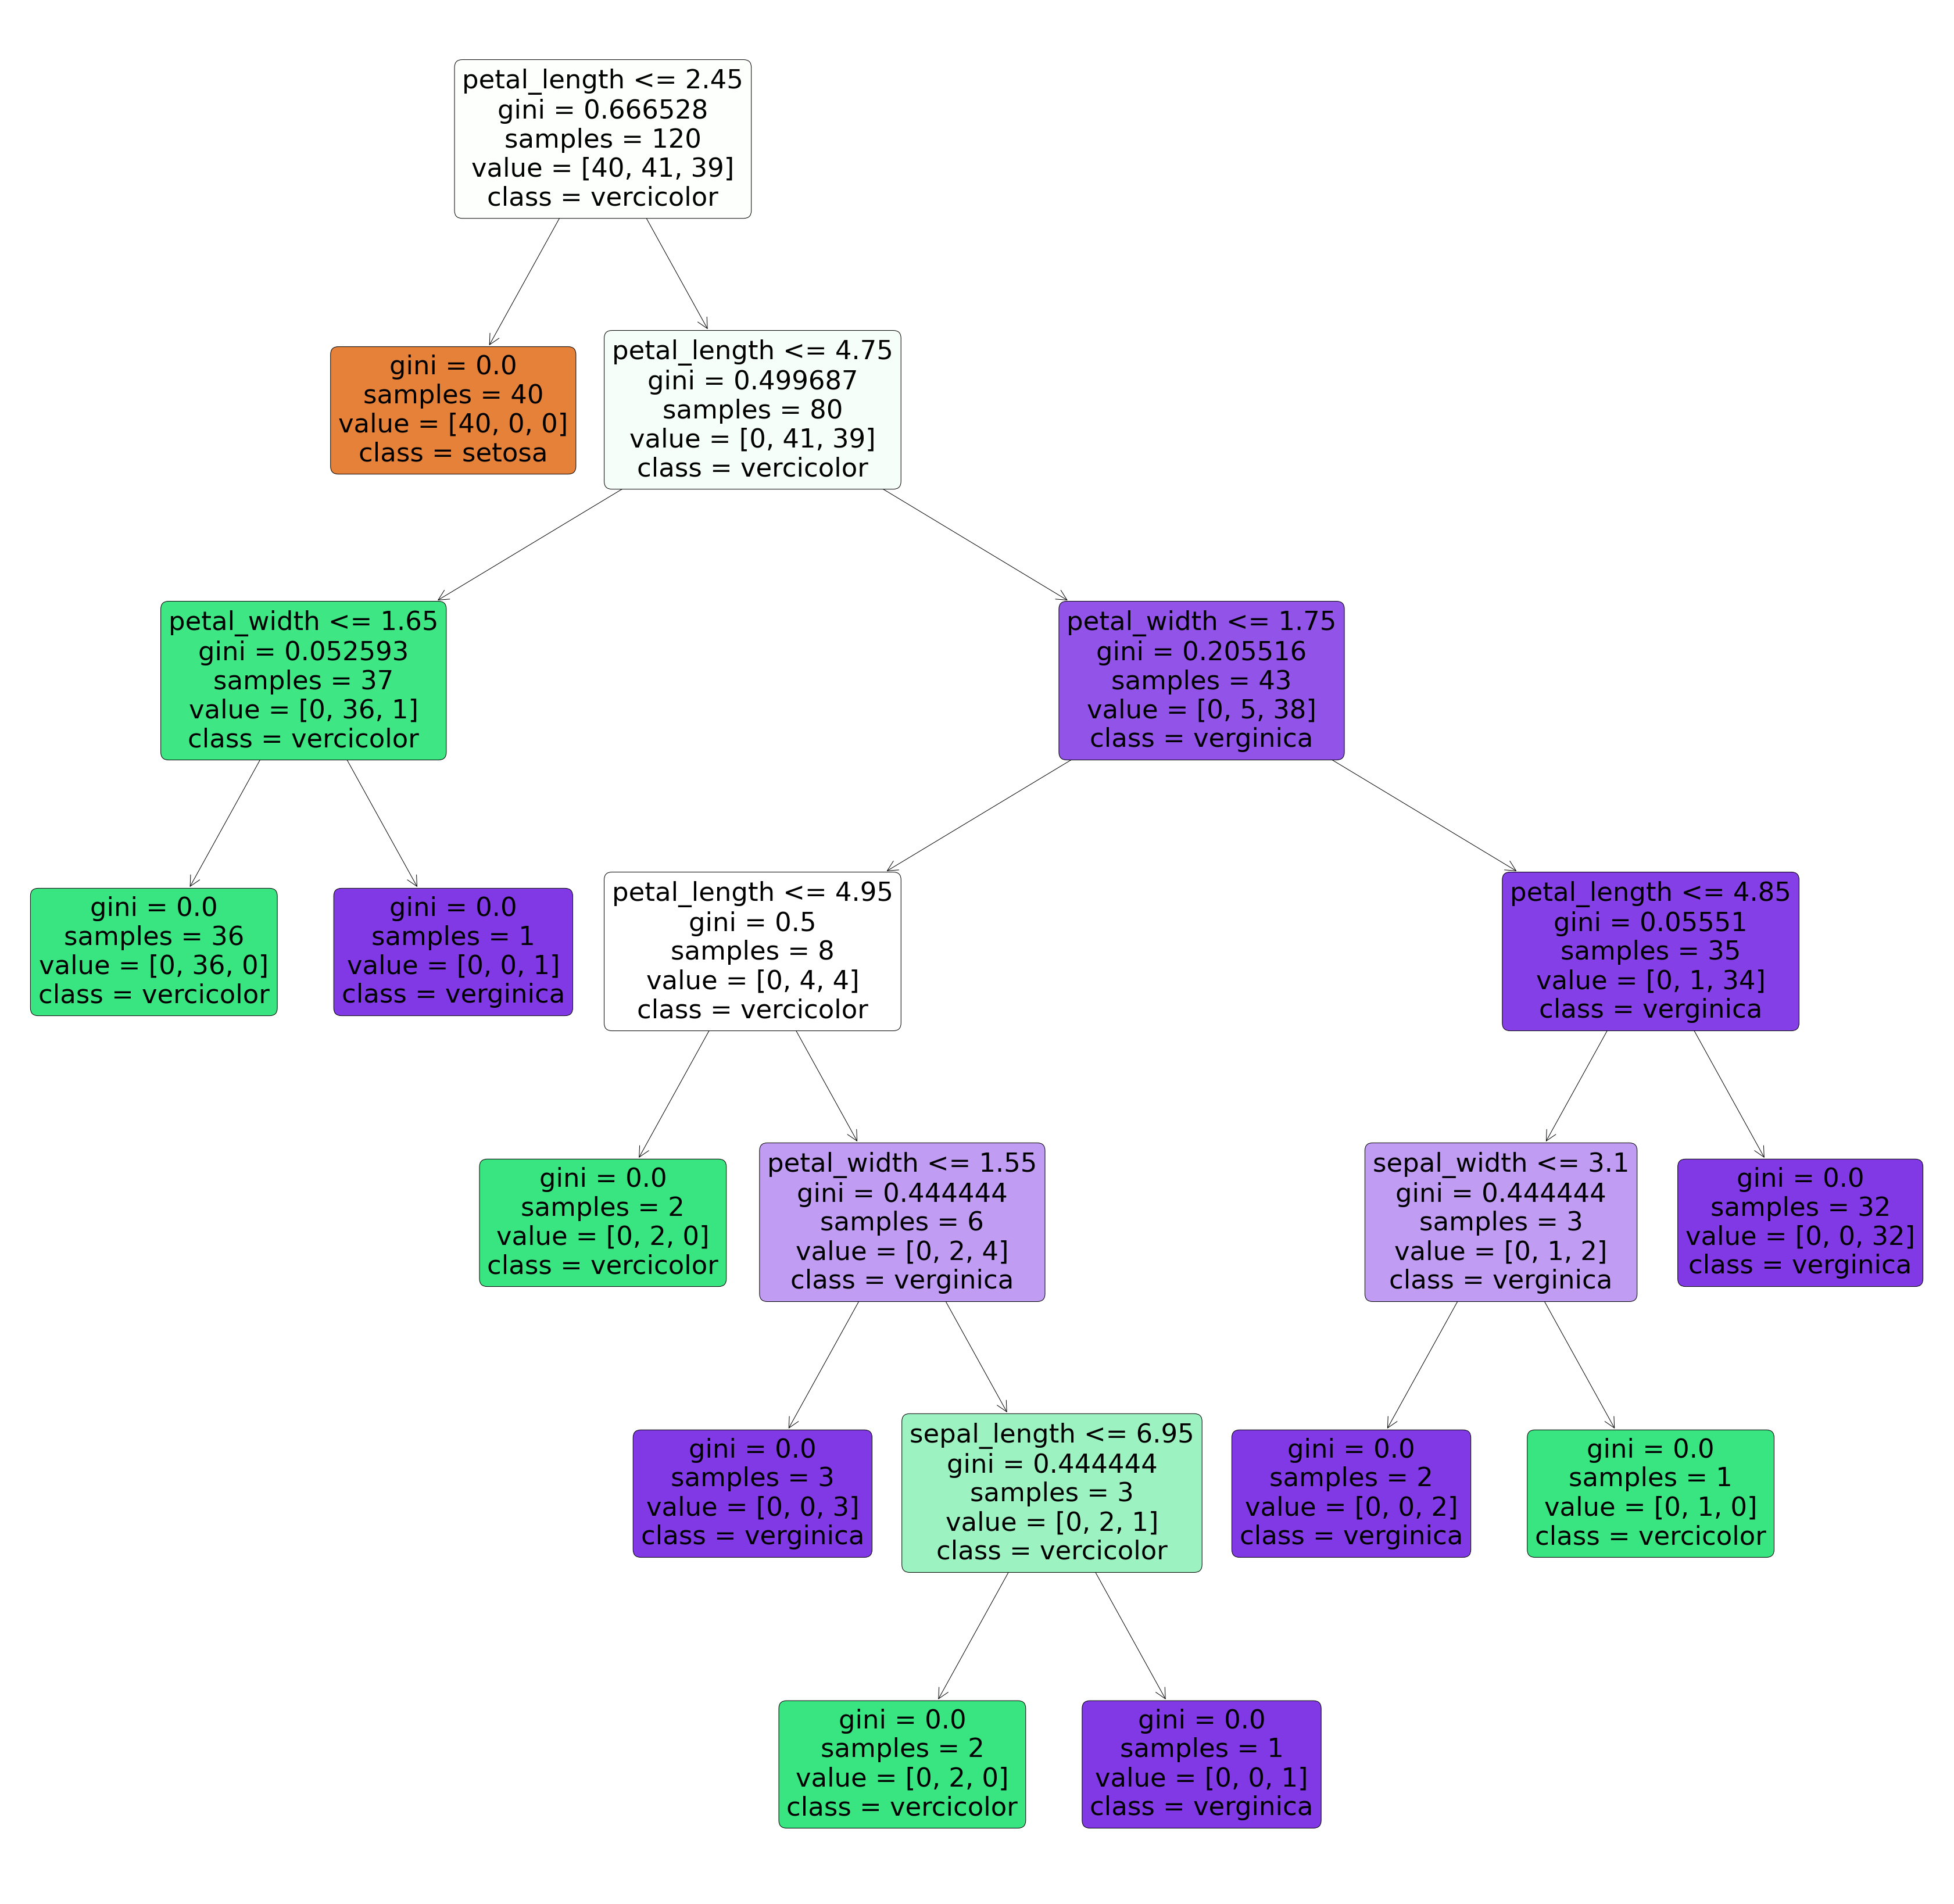

In [ ]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
plt.figure(figsize=(60,60))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 6, rounded = True)

Now you can visualise the decision tree. Each node contains the name of the variable of interest, the gini impurity, the records (or enconced labels in those nodes, and the prediction (the most likely plant class) at that node before splitting..

## Exercise



Answer the following questions:

1. What is the most likely plant type if the petal width is greater than 0.8 without further assestment?
2. And if the petal width is less than 0.8?
3. How likely is it to have a setosa plant if petal width is less than 0.8?
4. Can you suggest a chain of decisions for absolute certainty that your plant is vercicolor?

1. If the petal width is greater than 0.8, without further asessment, the most likely plant type is 'vercicolor'
 

2. If the petal width is less than 0.8, without further asessment, the most likely plant type is 'setosa'

3. It is %100 likely to have setosa if petal width is less than 0.8, because the gini is 0 (no impurity)

4. we can get this through by nested loop.

 if petal_width <= 0.8:
 if petal_length <= 4.75:
 if petal_width <= 1.65 and gini == 0, print(df['species']) 

In [ ]:
for i in df['species']:
  if(df[df['species'] >= 1.65]):
    if(df[df['species'] <= 1.75]):
     print(i)

## Additional exercise

Load another seaborn dataset or your own particular dataset and build your own decision tree.

In [ ]:
loan = pd.read_csv('/content/sample_data/loan_prediction.csv')
loan.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [ ]:
loan.shape

(614, 6)

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 28.9 KB


In [ ]:
# Checking for null values
loan.isnull().any()

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Loan_Status          False
dtype: bool

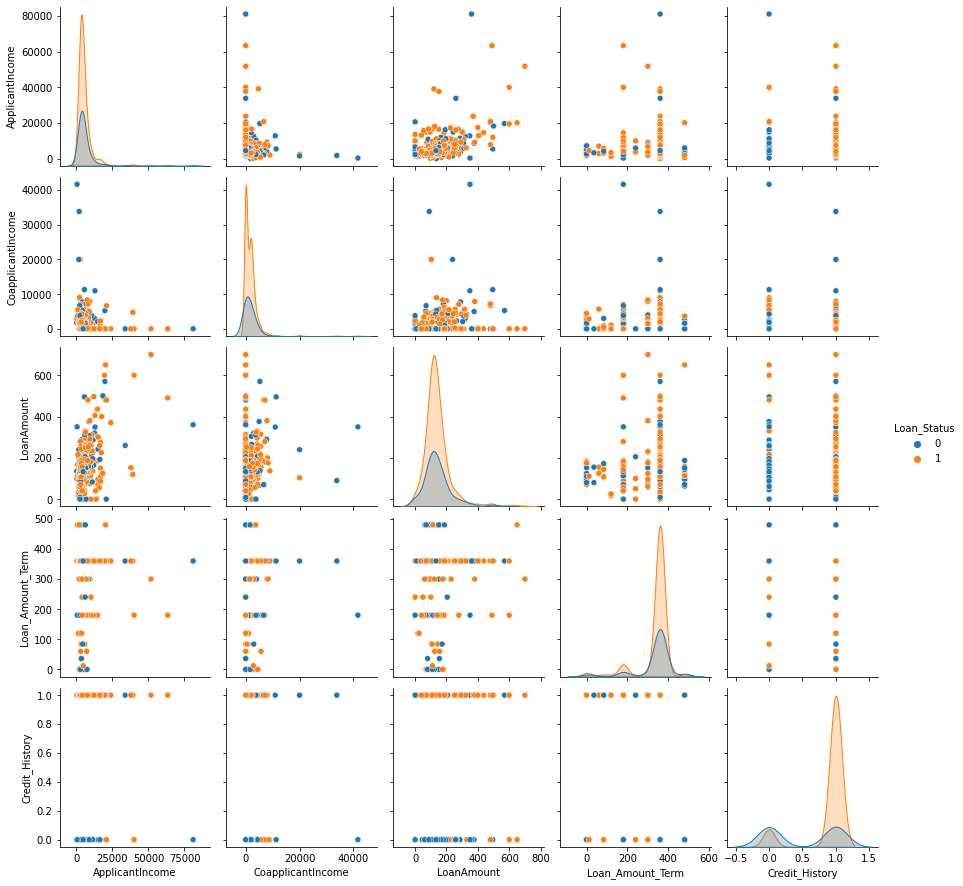

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=loan, hue = 'Loan_Status')

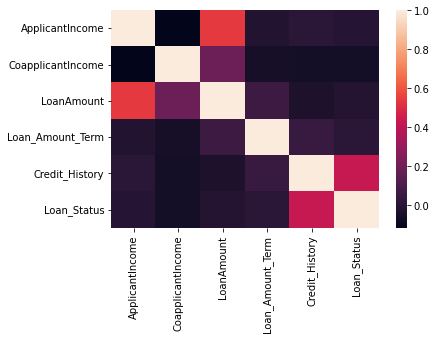

In [ ]:
# correlation matrix
sns.heatmap(loan.corr())

In [ ]:
# Splitting the data into training and target set
X = loan.iloc[:,0:5] #X = 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'
y = loan.iloc[:,5] #y = 'Loan_Status'

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (491, 5)
Testing split input-  (123, 5)


In [ ]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,0.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (491, 5)
Testing split input-  (123, 5)


In [ ]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [ ]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.47      0.40      0.43        43
           1       0.70      0.76      0.73        80

    accuracy                           0.63       123
   macro avg       0.59      0.58      0.58       123
weighted avg       0.62      0.63      0.63       123



Text(0.5, 1.0, 'Accuracy Score: 0.6341463414634146')

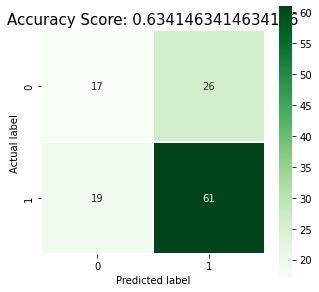

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

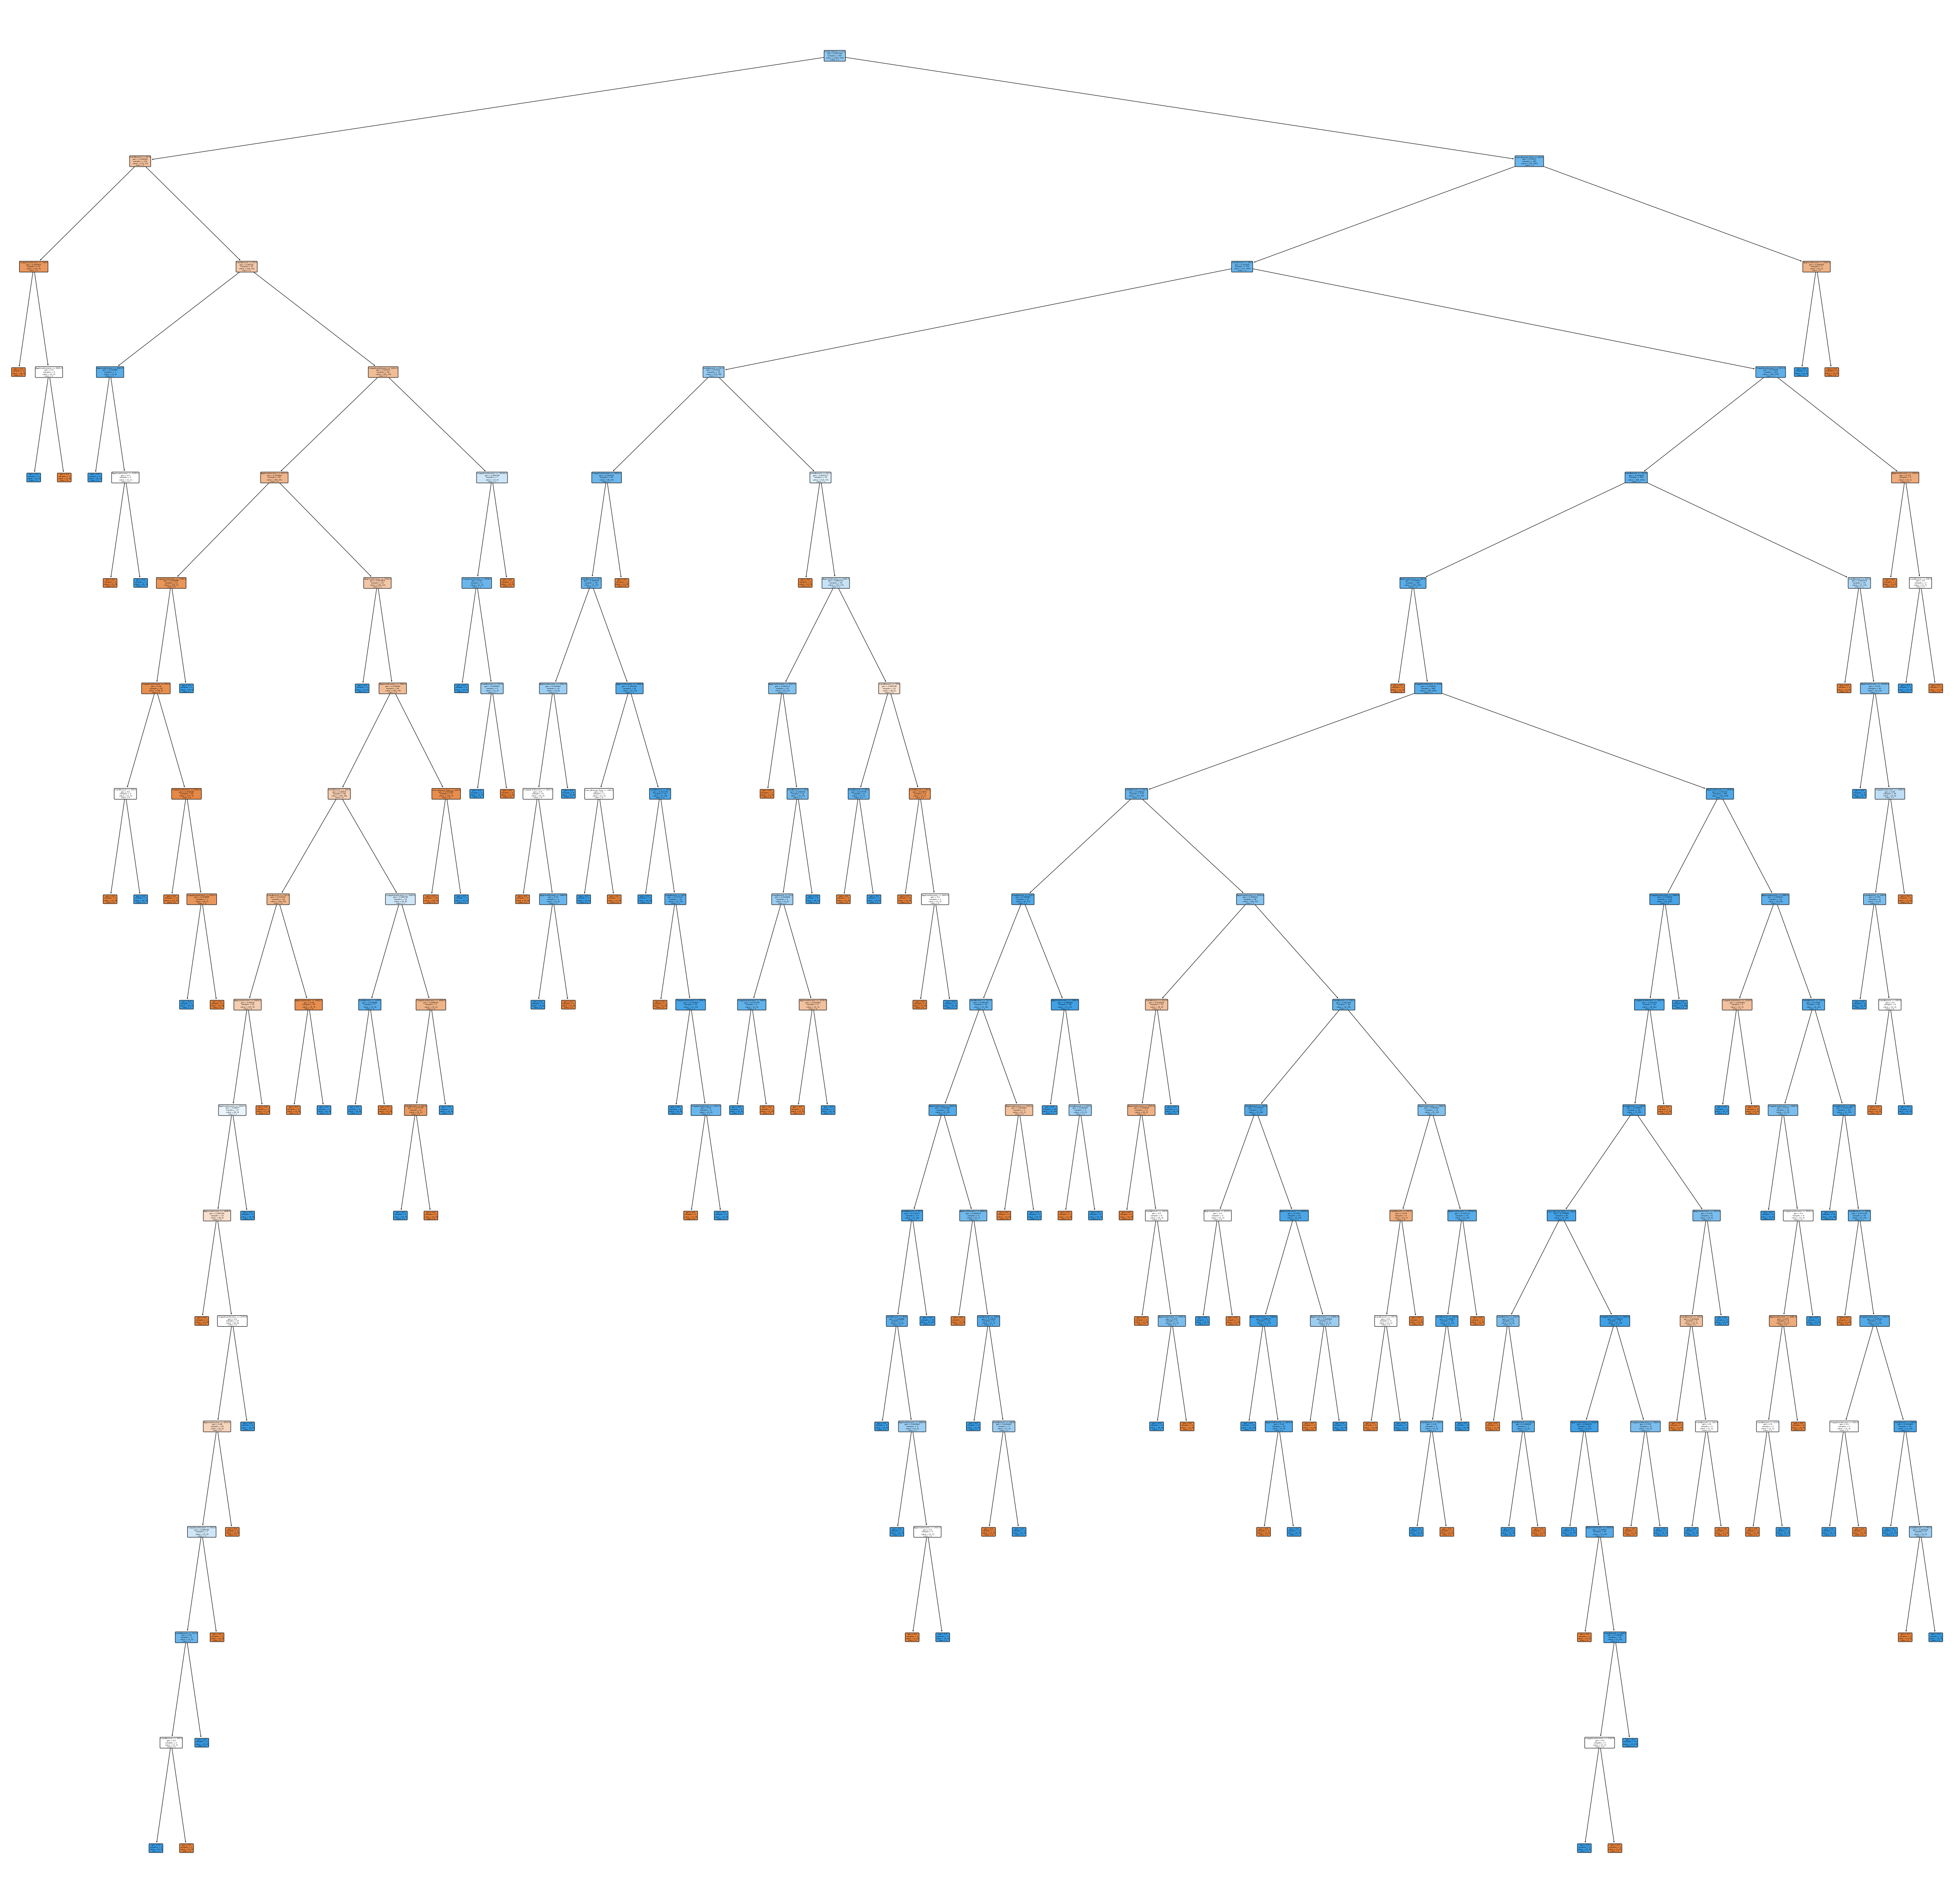

In [ ]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
plt.figure(figsize=(80,80))
dec_tree = plot_tree(decision_tree=dtree, feature_names = loan1.columns, 
                     class_names =["0", "1"] , filled = True , precision =6, rounded = True)